In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew

path='drive/My Drive/Datasets/he_challenge/'
import os
print(os.listdir(path))

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor 
from sklearn.impute import SimpleImputer
%matplotlib inline

['sample_submission.csv', 'Train.csv', 'Test.csv']


In [ ]:
pd.options.display.max_columns=1000
pd.options.display.max_rows=1000

In [ ]:
train=pd.read_csv(path+'Train.csv')
test=pd.read_csv(path+'Test.csv')

In [ ]:
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [ ]:
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [ ]:
(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

VAR4                         0.093714
VAR2                         0.082429
Age                          0.058857
Time_of_service              0.020571
Work_Life_balance            0.001571
Pay_Scale                    0.001286
Attrition_rate               0.000000
Time_since_promotion         0.000000
Gender                       0.000000
Education_Level              0.000000
Relationship_Status          0.000000
Hometown                     0.000000
Unit                         0.000000
Decision_skill_possess       0.000000
Travel_Rate                  0.000000
growth_rate                  0.000000
VAR7                         0.000000
Post_Level                   0.000000
Compensation_and_Benefits    0.000000
VAR1                         0.000000
VAR3                         0.000000
VAR5                         0.000000
VAR6                         0.000000
Employee_ID                  0.000000
dtype: float64

In [ ]:
def handle_non_numerical_data(df):
    columns = df.columns

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

train=handle_non_numerical_data(train)
test=handle_non_numerical_data(test)

In [ ]:
df=train
df.describe()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
count,7000.000000,7000.000000,6588.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,6856.000000,7000.000000,7000.000000,7000.000000,7000.000000,6991.000000,7000.000000,6989.000000,7000.000000,6423.000000,7000.000000,6344.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3499.500000,0.412286,39.622799,3.187857,0.645714,1.660000,5.484000,1.499000,13.385064,2.367143,47.064286,0.817857,2.798000,6.006294,2.470286,2.387895,3.098571,-0.008126,-0.013606,1.891078,2.834143,7.101286,3.257000,0.189376
std,2020.870275,0.492281,13.606920,1.065102,0.478330,1.340288,3.862219,1.119518,10.364188,1.149395,15.761406,0.648205,1.163721,2.058435,1.863303,1.122786,0.836377,0.989850,0.986933,0.529403,0.938945,1.164262,0.925319,0.185753
min,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-1.817600,-2.776200,1.000000,1.000000,5.000000,1.000000,0.000000
25%,1749.750000,0.000000,27.000000,3.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,33.000000,0.000000,2.000000,5.000000,0.000000,1.000000,3.000000,-0.961200,-0.453700,2.000000,2.000000,6.000000,3.000000,0.070400
50%,3499.500000,0.000000,37.000000,3.000000,1.000000,2.000000,6.000000,1.000000,10.000000,2.000000,47.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,-0.104800,-0.453700,2.000000,3.000000,7.000000,3.000000,0.142650
75%,5249.250000,1.000000,52.000000,4.000000,1.000000,3.000000,9.000000,3.000000,21.000000,3.000000,61.000000,1.000000,3.000000,8.000000,4.000000,3.000000,3.000000,0.751600,0.707500,2.000000,3.000000,8.000000,4.000000,0.235000
max,6999.000000,1.000000,65.000000,5.000000,1.000000,4.000000,11.000000,3.000000,43.000000,4.000000,74.000000,2.000000,5.000000,10.000000,4.000000,5.000000,5.000000,1.608100,1.868800,3.000000,5.000000,9.000000,5.000000,0.995900


In [ ]:
y=df.groupby(["Decision_skill_possess"]).agg(["mean","min","max"])[["Age","Pay_Scale","Attrition_rate"]]
print(round(y,2))

                          Age             Pay_Scale            Attrition_rate  \
                         mean   min   max      mean  min   max           mean   
Decision_skill_possess                                                          
0                       38.90  19.0  65.0      5.97  1.0  10.0           0.19   
1                       39.89  19.0  65.0      6.03  1.0  10.0           0.19   
2                       39.97  19.0  65.0      6.05  1.0  10.0           0.18   
3                       39.75  19.0  65.0      5.98  1.0  10.0           0.19   

                                   
                        min   max  
Decision_skill_possess             
0                       0.0  0.99  
1                       0.0  1.00  
2                       0.0  1.00  
3                       0.0  0.99  


In [ ]:
train['Gender'].value_counts()

0    4114
1    2886
Name: Gender, dtype: int64

In [ ]:
g=df.groupby(["Gender"]).agg(["mean","min","max"])[["Time_since_promotion","growth_rate","Post_Level","Pay_Scale"]]
print(round(g,2))

       Time_since_promotion         growth_rate         Post_Level          \
                       mean min max        mean min max       mean min max   
Gender                                                                       
0                      2.39   0   4       47.22  20  74       2.79   1   5   
1                      2.34   0   4       46.84  20  74       2.80   1   5   

       Pay_Scale             
            mean  min   max  
Gender                       
0           6.01  1.0  10.0  
1           5.99  1.0  10.0  



 mu = 0.19 and sigma = 0.19



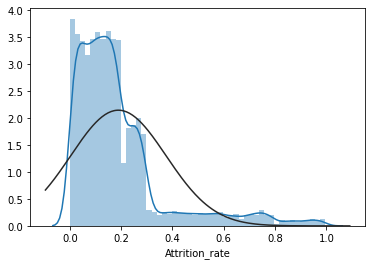

In [ ]:
sns.distplot(train['Attrition_rate'], fit=norm)
(mu, sigma)=norm.fit(train['Attrition_rate'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

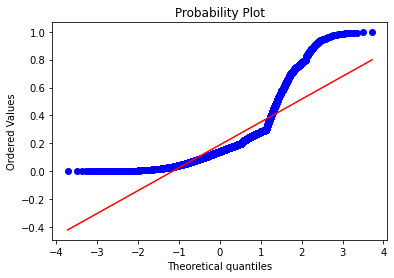

In [ ]:
fig=plt.figure()
res=stats.probplot(train['Attrition_rate'],plot=plt)
plt.show()

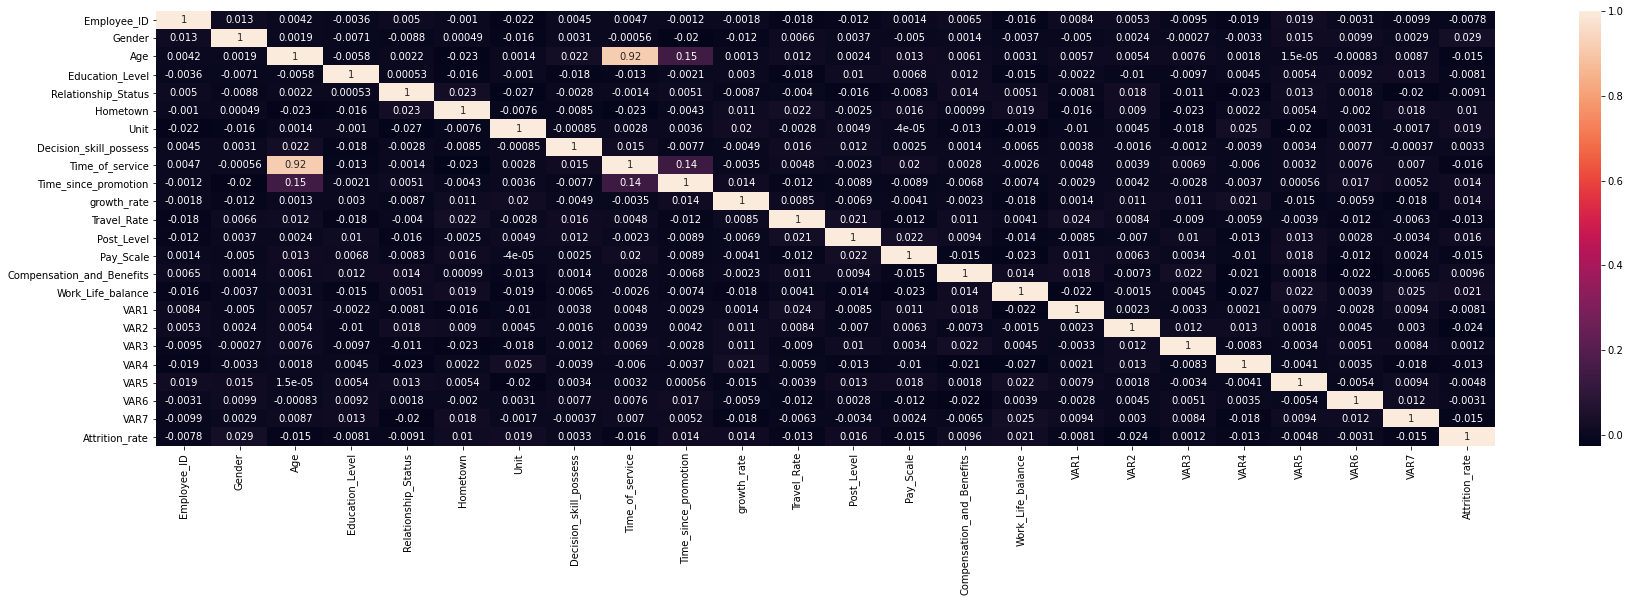

In [ ]:
plt.figure(figsize=(30,8))
sns.heatmap(train.corr(),annot = True)
plt.show()

In [ ]:
corr=train.corr()

In [ ]:
corr[corr['Attrition_rate']>=0.015].index

Index(['Gender', 'Unit', 'Post_Level', 'Work_Life_balance', 'Attrition_rate'], dtype='object')

In [ ]:
corr[corr['Attrition_rate']<=-0.015].index

Index(['Age', 'Time_of_service', 'Pay_Scale', 'VAR2', 'VAR7'], dtype='object')

In [ ]:
train=train[['Post_Level', 'Work_Life_balance', 'Attrition_rate','Gender', 'Age', 'Decision_skill_possess', 'Time_of_service',
       'Pay_Scale', 'Compensation_and_Benefits', 'VAR2', 'VAR7']]

test=test[['Employee_ID','Post_Level', 'Work_Life_balance','Gender', 'Age', 'Decision_skill_possess', 'Time_of_service',
       'Pay_Scale', 'Compensation_and_Benefits', 'VAR2', 'VAR7']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

train_X,train_y,test_X,test_y=train_test_split(train.drop(columns='Attrition_rate'), train['Attrition_rate'], )

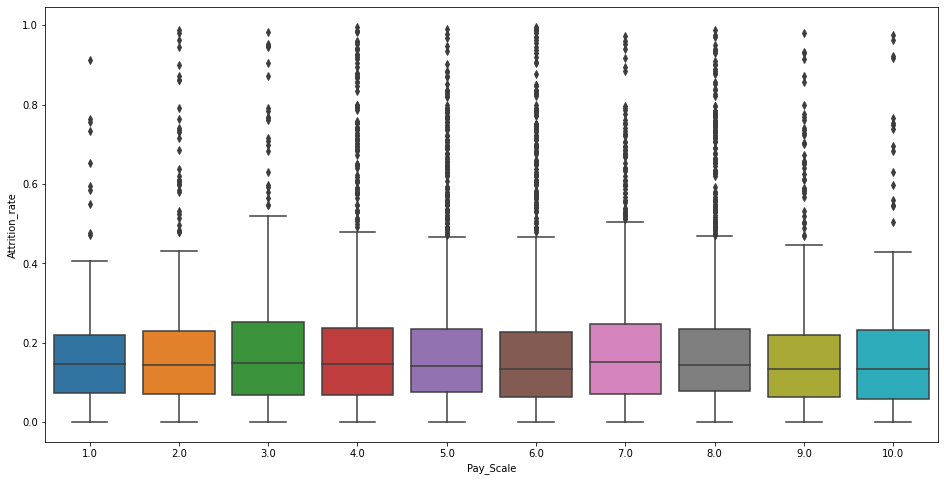

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Pay_Scale',y='Attrition_rate',data=train)
plt.show()

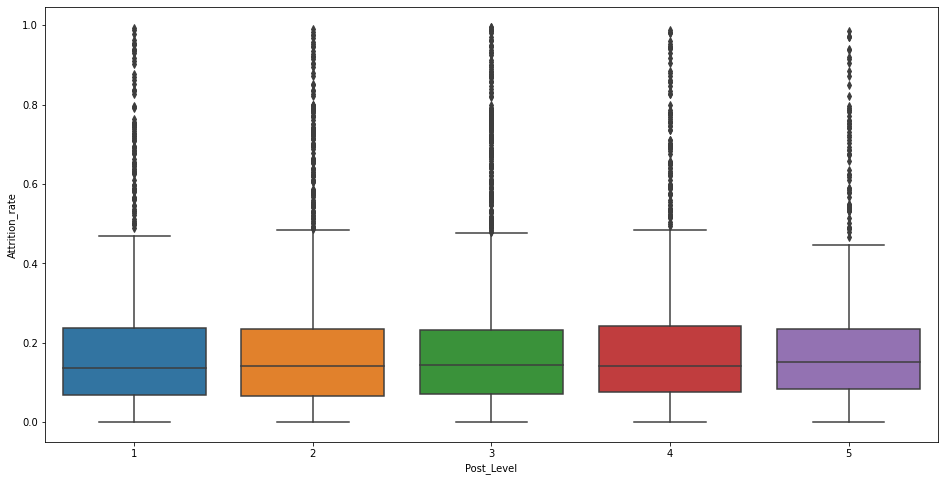

In [ ]:
plt.figure(figsize=(16,8))
sns.boxplot(x='Post_Level',y='Attrition_rate',data=train)
plt.show()

In [ ]:
(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)

VAR2                         0.082429
Age                          0.058857
Time_of_service              0.020571
Work_Life_balance            0.001571
Pay_Scale                    0.001286
VAR7                         0.000000
Compensation_and_Benefits    0.000000
Decision_skill_possess       0.000000
Gender                       0.000000
Attrition_rate               0.000000
Post_Level                   0.000000
dtype: float64

In [ ]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()

categorical_cols

#data = pd.get_dummies(data, columns=categorical_cols)
#from sklearn.preprocessing import LabelEncoder
#labelencoder = LabelEncoder()
#train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

[]

In [ ]:
#train['Pay_Scale'].unique() 6
#train['VAR2'].unique() -0.1048
#train['Time_of_service'].unique() 13
#train['Work_Life_balance'].mean() 2
#train['Age'].unique() 40

In [ ]:
train['Pay_Scale']=train['Pay_Scale'].fillna(6)
train['VAR2']=train['VAR2'].fillna(-0.1048)
train['Time_of_service']=train['Time_of_service'].fillna(13)
train['Work_Life_balance']=train['Work_Life_balance'].fillna(2)
train['Age']=train['Age'].fillna(40)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
test['Pay_Scale']=test['Pay_Scale'].fillna(6)
test['VAR2']=test['VAR2'].fillna(-0.1048)
test['Time_of_service']=test['Time_of_service'].fillna(13)
test['Work_Life_balance']=test['Work_Life_balance'].fillna(2)
test['Age']=test['Age'].fillna(40)

In [ ]:
(test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)

VAR7                         0.0
VAR2                         0.0
Compensation_and_Benefits    0.0
Pay_Scale                    0.0
Time_of_service              0.0
Decision_skill_possess       0.0
Age                          0.0
Gender                       0.0
Work_Life_balance            0.0
Post_Level                   0.0
Employee_ID                  0.0
dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(train.drop('Attrition_rate', axis=1),train['Attrition_rate'],test_size=0.3,random_state=2020)

In [ ]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
sc_y = MinMaxScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
print(lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [ ]:
print(lr.intercept_)
print(lr.coef_)

[0.20187631]
[[ 0.00685198  0.00580086  0.00853633  0.01371888  0.00656978 -0.02103199
  -0.01135286  0.00636889 -0.02760303 -0.0155034 ]]


In [ ]:
pred=lr.predict(X_test)
pred=pred.reshape(-1,1)

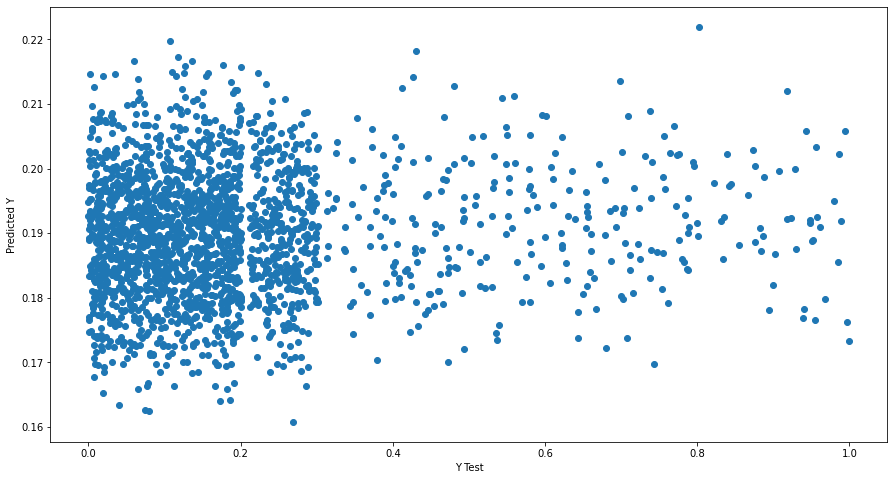

In [ ]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

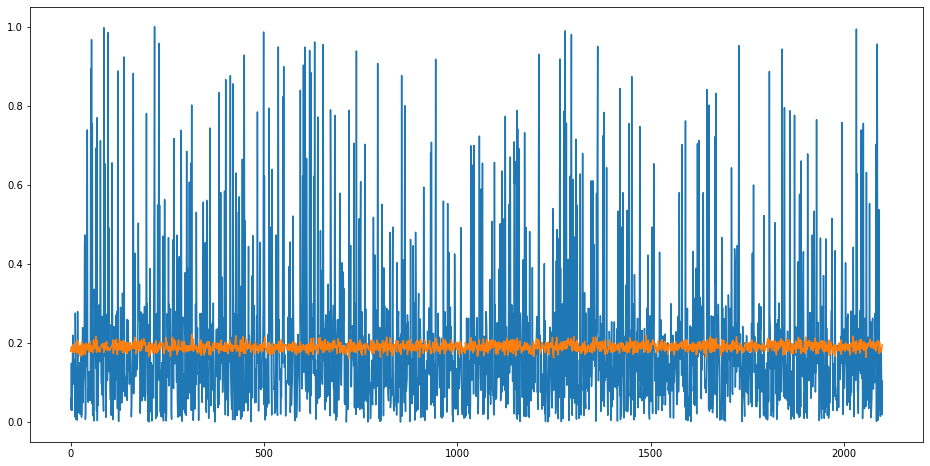

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(pred, label = 'predict')
plt.show()

In [ ]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,pred))
print('MSE:', metrics.mean_squared_error(y_test,pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE: 0.12964524092025326
MSE: 0.03646885062178973
RMSE: 0.19096819269655804


In [ ]:
print(pred)

[[0.18092623]
 [0.1771434 ]
 [0.18588391]
 ...
 [0.16734797]
 [0.18559409]
 [0.18759133]]


In [ ]:
X=train.drop('Attrition_rate', axis=1)
Y=train['Attrition_rate']
Y=Y.values.reshape(-1,1)
X=sc_X.fit_transform(X)
Y=sc_y.fit_transform(Y)

In [ ]:
lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
testset=test.drop('Employee_ID',axis=1)
preds=lr.predict(testset)
preds.reshape(-1,)
preds=pd.DataFrame(preds)
preds.to_csv('sub.csv')

array([-0.17877013, -0.69730836, -0.57266658, ..., -0.73886916,
       -0.58527423, -0.40767761])

In [ ]:
def submit(preds, emp, filename = 'submission.csv'):
    dict = {"Employee_ID": emp, "Attrition_rate": preds}
    sub = pd.DataFrame(dict)
    sub.to_csv(filename)

In [ ]:
tt=test['Employee_ID'].values
tt=tt.reshape(1,-1)
preds=preds.values
preds=preds.reshape(1,-1)

In [ ]:
tt.shape
preds.shape

(1, 3000)

In [ ]:
submit(tt, preds)

ValueError: ignored

In [ ]:
(preds.values).shape

(3000, 1)

In [ ]:
from sklearn import ensemble 
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.05, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
clf_pred=clf.predict(X_test)
clf_pred= clf_pred.reshape(-1,1)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, clf_pred))
print('MSE:', metrics.mean_squared_error(y_test, clf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, clf_pred)))

MAE: 0.6679542446381215
MSE: 0.9432210339971141
RMSE: 0.971195672352958


In [ ]:
testset=test.drop('Employee_ID',axis=1)
preds=clf.predict(testset)

In [ ]:
preds.reshape(-1,)
preds=pd.DataFrame(preds)
preds.to_csv('sub.csv')

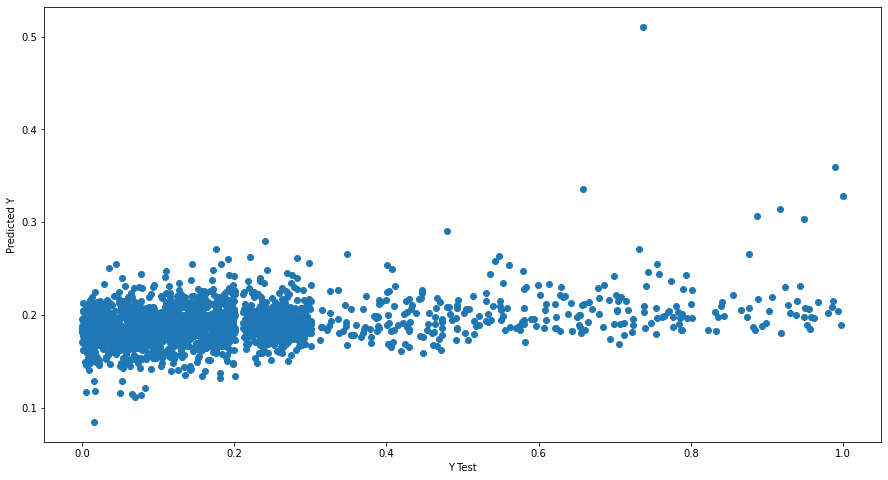

In [234]:
pred=clf.predict(X_test)
pred=pred.reshape(-1,1)
plt.figure(figsize=(15,8))
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

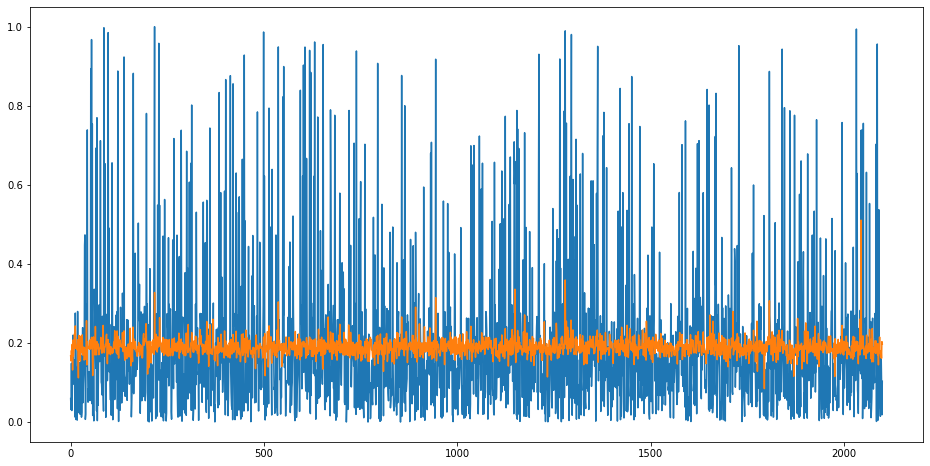

In [235]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(pred, label = 'predict')
plt.show()

In [236]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=100, splitter='best')

In [237]:
dtr_pred = dtreg.predict(X_test)
dtr_pred= dtr_pred.reshape(-1,1)

MAE: 0.18605202589170242
MSE: 0.07588832492959585
RMSE: 0.27547835655382413


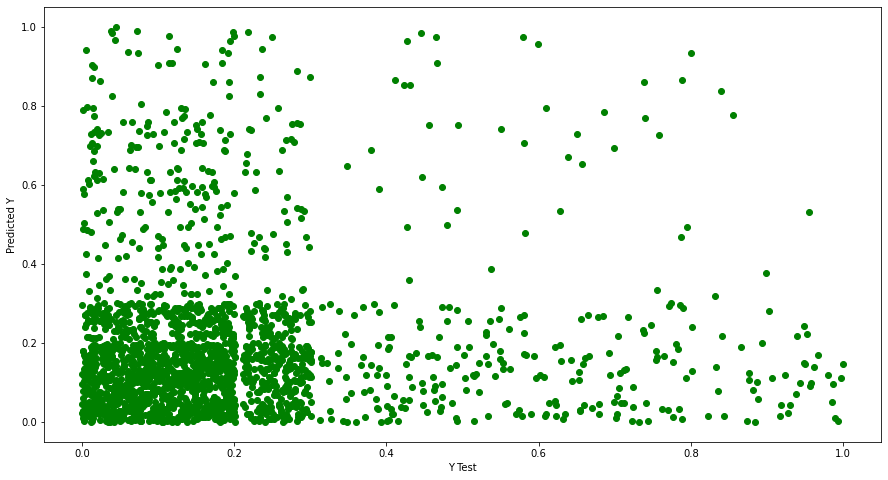

In [238]:
print('MAE:', metrics.mean_absolute_error(y_test, dtr_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, dtr_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 0.12874115794178442
MSE: 0.03941711350465308
RMSE: 0.1985374360282037


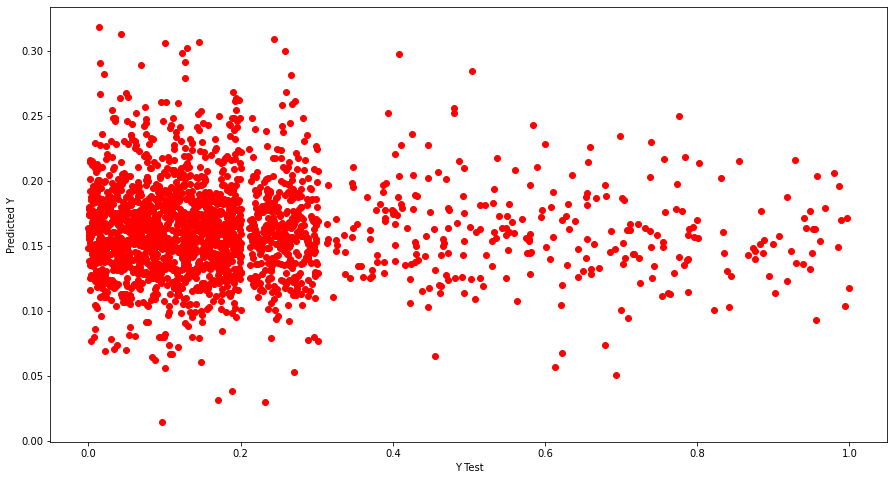

In [242]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
svr_pred= svr_pred.reshape(-1,1)

print('MAE:', metrics.mean_absolute_error(y_test, svr_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))

plt.figure(figsize=(15,8))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [244]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)
rfr.fit(X, Y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [245]:
rfr_pred= rfr.predict(X_test)
rfr_pred = rfr_pred.reshape(-1,1)

MAE: 0.05304491215590497
MSE: 0.005719765685014195
RMSE: 0.07562913251528272


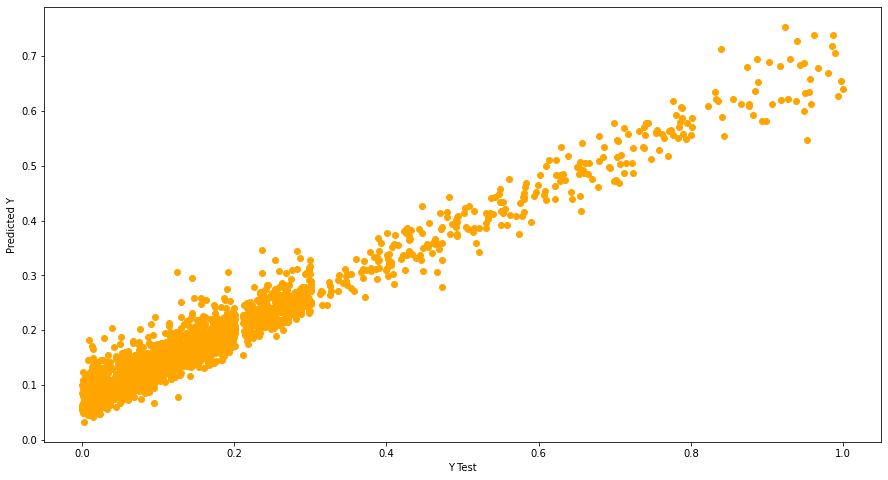

In [246]:
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))


plt.figure(figsize=(15,8))
plt.scatter(y_test,rfr_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [247]:
testset=test.drop('Employee_ID',axis=1)
preds=rfr.predict(testset)
preds.reshape(-1,)
preds=pd.DataFrame(preds)
preds.to_csv('sub.csv')